# Menyiapkan Data dan Library

In [1]:
# mengimport library yang diperlukan
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# menampilkan list dataset
os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['bottle.csv',
 'iris.csv',
 'heart.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'auto.csv',
 'winequality-white.csv']

In [3]:
# membaca dataset yang digunakan
dataset = pd.read_csv('bottle.csv')

dataset.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering Dan EDA

In [4]:
# melihat informasi dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
# melihat statistik dataset
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [6]:
# melihat feature dataset yang kosong
dataset.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [7]:
# melihat nama kolom feature
dataset.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [8]:
# membuang data text atau kategori
kolom_hapus = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'IncTim','DIC Quality Comment']
dataset.drop(kolom_hapus, axis=1, inplace=True)

dataset.head(3)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# mengisi data NaN dengan nilai rata-rata perkolom feature
kolom = dataset.columns
for n in kolom:
   dataset[n] = dataset[n].fillna(dataset[n].mean())

dataset.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
0,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,10.497426,3,1.0,7.471829,2.0,7.945057,9.0,9.0,8.46701,9.0,0.450185,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,0.084877,9.0,9.757704,1.266928,9.0,9.762613,1.267776,9.0,0.155295,1.99345,9.0,8.39353,1.256587,9.0,18.356509,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,0,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
1,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,10.497426,3,2.0,7.471829,2.0,7.945057,9.0,9.0,8.46701,9.0,0.450185,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,0.084877,9.0,9.757704,1.266928,9.0,9.762613,1.267776,9.0,0.155295,1.99345,9.0,8.39353,1.256587,9.0,18.356509,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,8,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
2,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,10.497426,7,2.0,7.471829,3.0,7.945057,9.0,9.0,8.46701,9.0,0.450185,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,0.084877,9.0,9.757704,1.266928,9.0,9.762613,1.267776,9.0,0.155295,1.99345,9.0,8.39353,1.256587,9.0,18.356509,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,10,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
3,19,10.45,33.420,3.392468,25.643,57.103779,148.808694,10.497426,3,2.0,7.471829,2.0,7.945057,9.0,9.0,8.46701,9.0,0.450185,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,0.084877,9.0,9.757704,1.266928,9.0,9.762613,1.267776,9.0,0.155295,1.99345,9.0,8.39353,1.256587,9.0,18.356509,19.0,10.45,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,19,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
4,20,10.45,33.421,3.392468,25.643,57.103779,148.808694,10.497426,7,2.0,7.471829,3.0,7.945057,9.0,9.0,8.46701,9.0,0.450185,9.0,0.198553,9.0,1.564747,9.0,26.606587,9.0,0.042316,9.0,17.302247,9.0,0.084877,9.0,9.757704,1.266928,9.0,9.762613,1.267776,9.0,0.155295,1.99345,9.0,8.39353,1.256587,9.0,18.356509,20.0,10.45,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,20,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983


In [10]:
# melihat apakan dataset masih ada yang kosong
if dataset.values is not np.NaN:
  print('Data tidak ada yang NaN')

Data tidak ada yang NaN


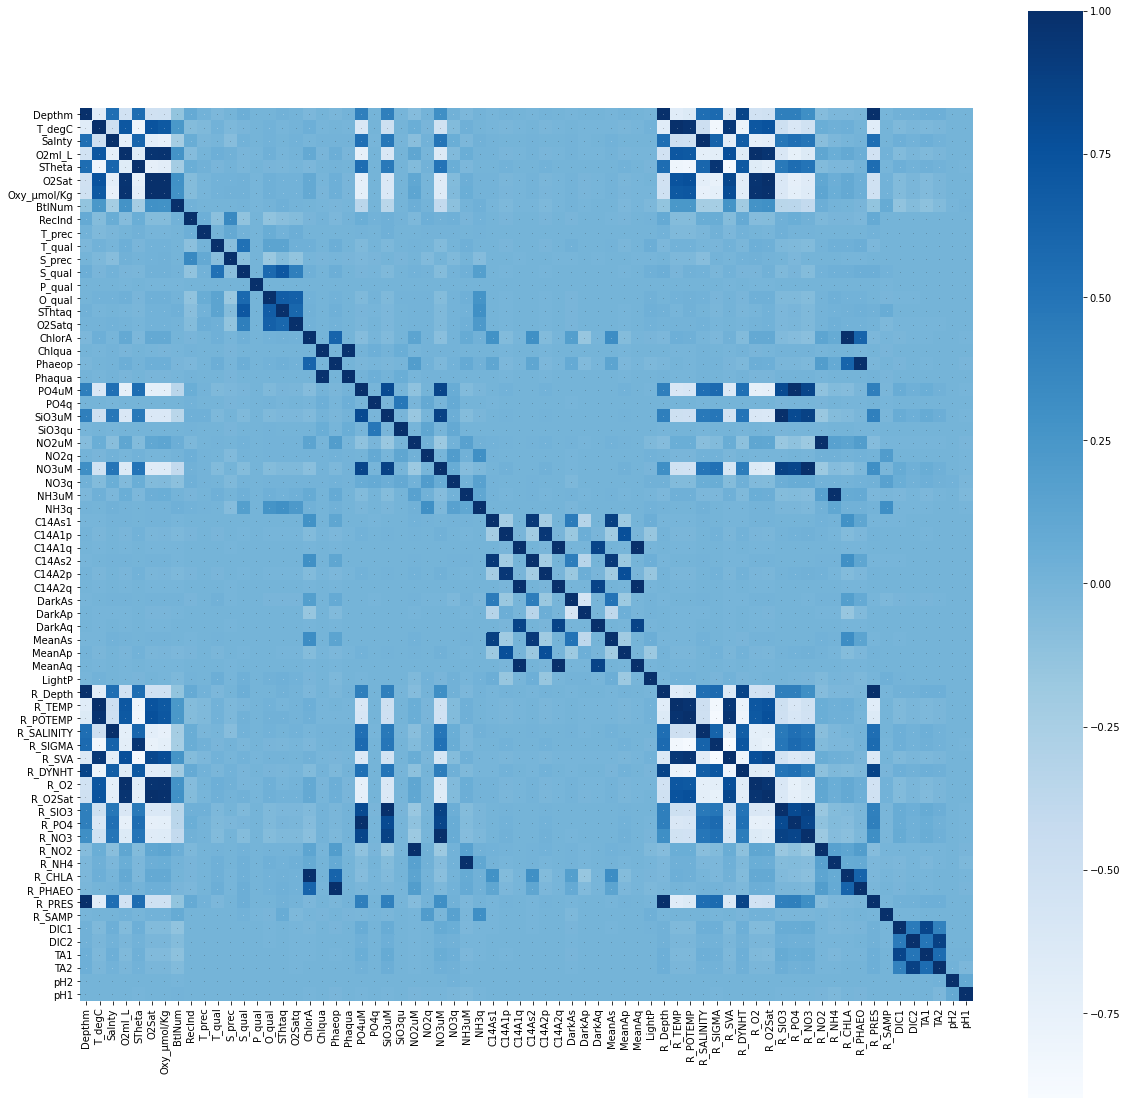

In [19]:
# melihat korelasi antar feature
corr = dataset.corr()

plt.figure(figsize=(20,20))
sb.heatmap(corr, annot=True, cbar=True, square= True, fmt='.1f', annot_kws={'size':1}, cmap='Blues')
plt.show()

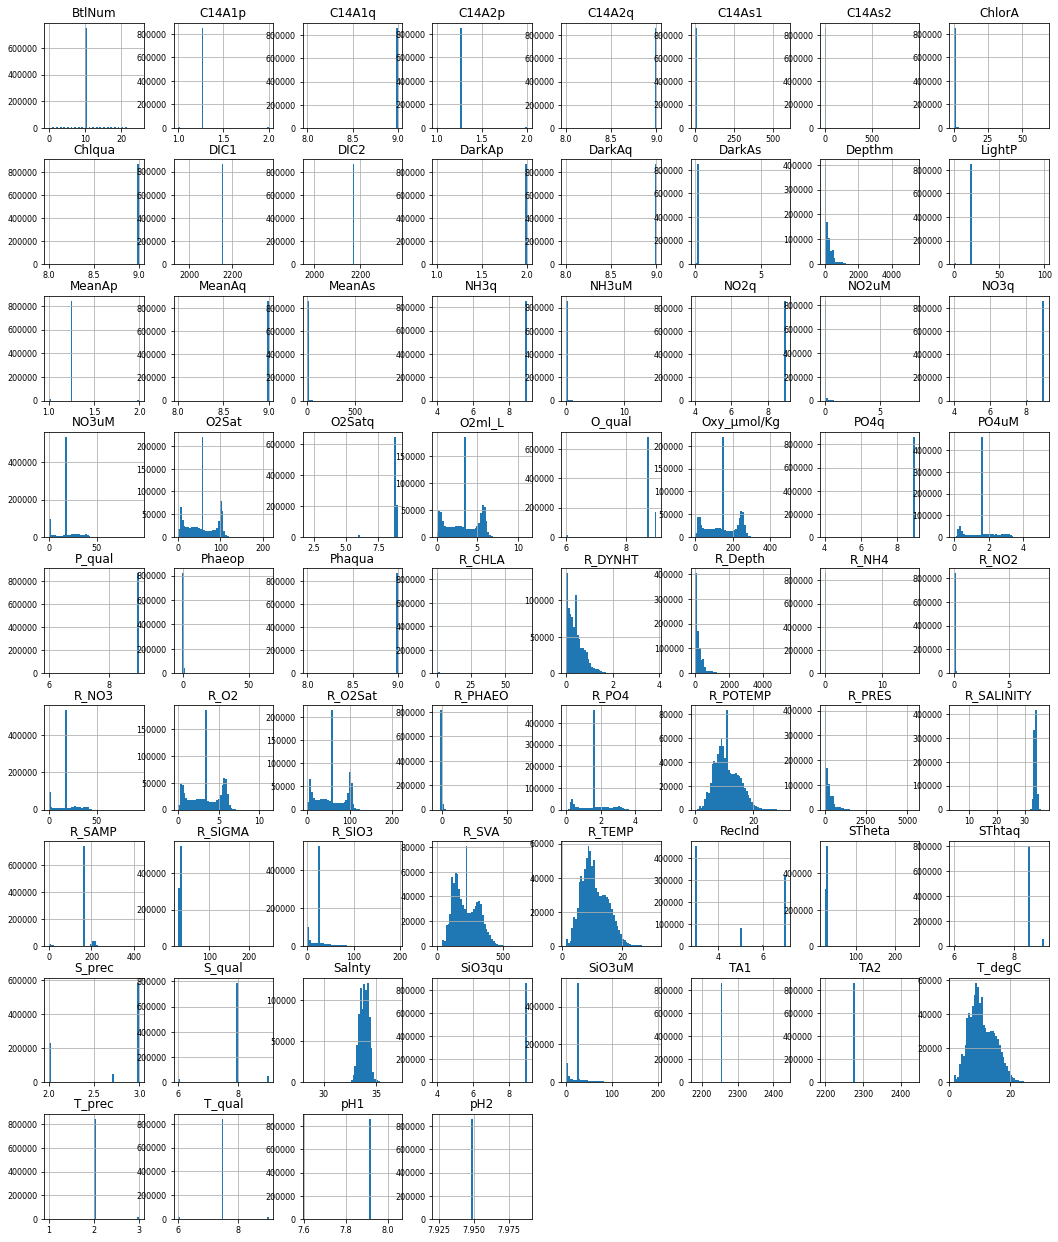

In [20]:
# EDA hist
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# DENGAN MEMAKAI SEMUA KOLOM FEATURE KECUALI YANG BERUPA TEXT ATAU KATEGORI

In [18]:
# memisahkan data feature dan label
feature = dataset.drop(['T_degC'], axis=1)
label = dataset['T_degC']

In [19]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scalling
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

# Melatih Model dan Evaluasi

## Random Forest Regressor

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


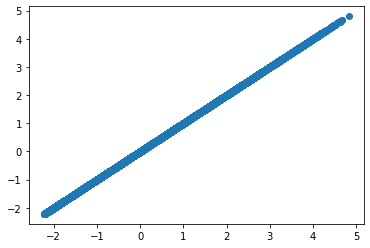

In [15]:
plt.scatter(label_test, test_pred)
plt.show()

## XGBoost Regressor

In [16]:
# melatih dataset dengan algoritma xgboost
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
xgbr_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 15, n_estimators = 1000)
xgbr_model.fit(feature_train, label_train)

# prediksi
train_pred = xgbr_model.predict(feature_train)
test_pred = xgbr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


## Linear Regression

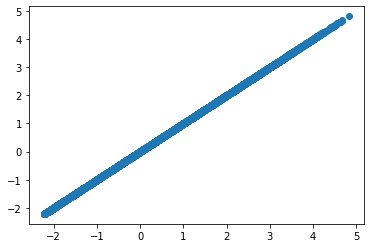

In [18]:
plt.scatter(label_test, test_pred)
plt.show()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
rfr_model = LinearRegression()
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


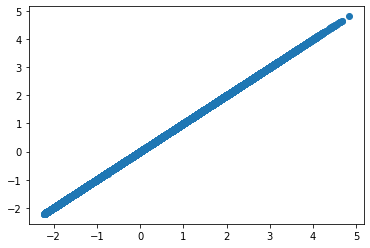

In [22]:
plt.scatter(label_test, test_pred)
plt.show()

# DENGAN MENGURANGI KOLOM FEATURE YANG KORELASI RENDAH

In [11]:
dataset.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec',
       'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua',
       'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM',
       'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q',
       'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs',
       'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [12]:
# membuang data yang korelasi rendah
kolom_hapus = ['RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual',
               'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua','Phaeop', 
               'Phaqua', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 
               'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 
               'MeanAs','MeanAp', 'MeanAq', 'LightP', 'R_NO2', 'R_NH4', 'R_CHLA', 
               'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1',
               'BtlNum', 'SiO3qu', 'PO4q', 'NO2uM', 'NO2q']

dataset_baru = dataset.drop(kolom_hapus, axis=1)

dataset_baru.head(3)

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,NO3uM,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_PRES
0,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,1.564747,26.606587,17.302247,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,26.606862,1.564736,17.302188,0
1,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,1.564747,26.606587,17.302247,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,26.606862,1.564736,17.302188,8
2,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,1.564747,26.606587,17.302247,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,26.606862,1.564736,17.302188,10


In [13]:
# memisahkan data feature dan label
feature = dataset_baru.drop(['T_degC'], axis=1)
label = dataset_baru['T_degC']

## Preprocessing

In [15]:
# melakukan scalling dan membagi feture dan label
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

standard_scaler = preprocessing.StandardScaler() 
power_transformer_yj = preprocessing.PowerTransformer(method='yeo-johnson') 
power_transformer_bc = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer()
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
robust_scaler = preprocessing.RobustScaler()

scalling =[standard_scaler, power_transformer_yj, power_transformer_bc,
           quantile_transformer, min_max_scaler, max_abs_scaler, robust_scaler]

feature_train = []
feature_test = []
label_train = []
label_test = []

for scaler in scalling:
  try:
    feature_scaled = scaler.fit_transform(feature.values)
    label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()
    x_train, x_test, y_train, y_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)
    feature_train.append(x_train)
    feature_test.append(x_test)
    label_train.append(y_train)
    label_test.append(y_test)

  except:
    # melihat scalling yang tidak dapat digunakan
    print('Error terjadi pada: ', scaler)
    print('Karene tidak dapat mengoleh data yang bernilai minus atau nol')
    print('\n')
    pass

Error terjadi pada:  PowerTransformer(copy=True, method='box-cox', standardize=True)
Karene tidak dapat mengoleh data yang bernilai minus atau nol




In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr_model = LinearRegression()

# list scalling yang bisa digunakan
scalling_use =['standard_scaler', 'power_transformer_yj', 'quantile_transformer', 
           'min_max_scaler', 'max_abs_scaler', 'robust_scaler']

for i in range(6):  
  lr_model.fit(feature_train[i], label_train[i])

  # prediksi
  feature_train_pred = lr_model.predict(feature_train[i])
  feature_test_pred = lr_model.predict(feature_test[i])

  # evaluasi
  score_x = r2_score(label_train[i], feature_train_pred)
  score_y = r2_score(label_test[i], feature_test_pred)
  rmse_x = np.sqrt(mean_squared_error(label_train[i], feature_train_pred))
  rmse_y = np.sqrt(mean_squared_error(label_test[i], feature_test_pred))


  print('Berikut hasil evaluasi dengan scalling: ', scalling_use[i])
  print('- Nilai r2_score train \t:', round(score_x, 2))
  print('- Nilai r2_score test \t:', round(score_y, 2))
  print('- Nilai RMSE train \t:', round(rmse_x, 2))
  print('- Nilai RMSE test \t:', round(rmse_y, 2))
  print('\n')

Berikut hasil evaluasi dengan scalling:  standard_scaler
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


Berikut hasil evaluasi dengan scalling:  power_transformer_yj
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


Berikut hasil evaluasi dengan scalling:  quantile_transformer
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


Berikut hasil evaluasi dengan scalling:  min_max_scaler
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


Berikut hasil evaluasi dengan scalling:  max_abs_scaler
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


Berikut hasil evaluasi dengan scalling:  robust_scaler
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai

In [17]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scalling
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

# Melatih Model dan Evaluasi

### Random Forest Regressor

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


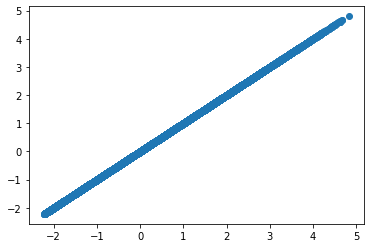

In [37]:
plt.scatter(label_test, test_pred)
plt.show()

## Linear Regression

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
rfr_model = LinearRegression()
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', score_train)
print('- Nilai r2_score test \t:', score_test)
print('- Nilai RMSE train \t:', rmse_train)
print('- Nilai RMSE test \t:', rmse_test)

- Nilai r2_score train 	: 0.9999999813972227
- Nilai r2_score test 	: 0.9999999448645179
- Nilai RMSE train 	: 0.0001363099547860055
- Nilai RMSE test 	: 0.0002352319701809379


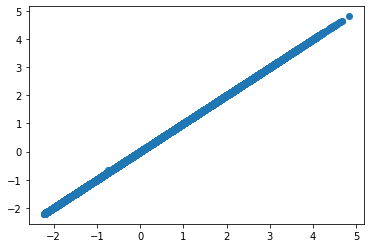

In [40]:
plt.scatter(label_test, test_pred)
plt.show()

## XGBoost

In [18]:
# melatih dataset dengan algoritma xgboost
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
xgbr_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 15, n_estimators = 1000)
xgbr_model.fit(feature_train, label_train)

# prediksi
train_pred = xgbr_model.predict(feature_train)
test_pred = xgbr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


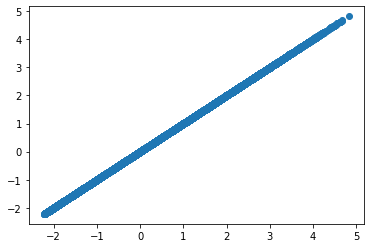

In [19]:
plt.scatter(label_test, test_pred)
plt.show()

### SVR

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.01)
svr_model.fit(feature_train, label_train)

# prediksi
train_pred = svr_model.predict(feature_train)
test_pred = svr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', score_train)
print('- Nilai r2_score test \t:', score_test)
print('- Nilai RMSE train \t:', rmse_train)
print('- Nilai RMSE test \t:', rmse_test)

In [ ]:
plt.scatter(label_test, test_pred)
plt.show()

## KNN Regressor

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(feature_train, label_train)

# prediksi
train_pred = knn_model.predict(feature_train)
test_pred = knn_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

In [ ]:
plt.scatter(label_test, test_pred)
plt.show()

## Kesimpulan:
- Baik menggunakan semua feature yang tdk ada kategori maupun menggunakan feature dengan korelasi tinggi hasil prediksinya cukup bagus dengan r2_score mendekati 1.00 dan rmse 0.0.
- Dari preprocessing yang digunakan pada algoritma linear regression juga menghasilkan prediksi yang bagus kecuali preprocessing dengan scalling power transformer box-cox yang tidak bisa jika ada nilai minus atau nol karena pada data set ini terdapat nilai tersebut.
- Dari gambar grafik yang dihasilkan semuanya menghasilkan garis yang diagonal yang berarti hasil prediksinya bagus.
- Algoritma KNN dan SVC proses modellingnya lumayan lama karena data yang diolah lumayan banyak.